In [175]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [176]:
n_task_per_file =10
n_files = 20
base_dir = "vary_p_test_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [177]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [178]:
oper_char_df

,Coverage Rate,Length,MSE,Method,p
0,0.857143,3.488819,4.851194,RRT,5
1,0.714286,63.810092,4.585097,Tree-Values,5
2,0.833333,6.056615,5.683069,UV(0.1),5
3,1.000000,3.432193,5.359974,RRT,10
4,0.750000,44.390558,5.130323,Tree-Values,10
...,...,...,...,...,...
85,0.875000,30.789966,4.547040,Tree-Values,10
86,1.000000,5.819194,4.312279,UV(0.1),10
87,1.000000,3.507531,5.111540,RRT,20
88,1.000000,14.075279,5.309241,Tree-Values,20


In [179]:
1782/9

198.0

In [180]:
oper_char_df.index = range(oper_char_df.shape[0])

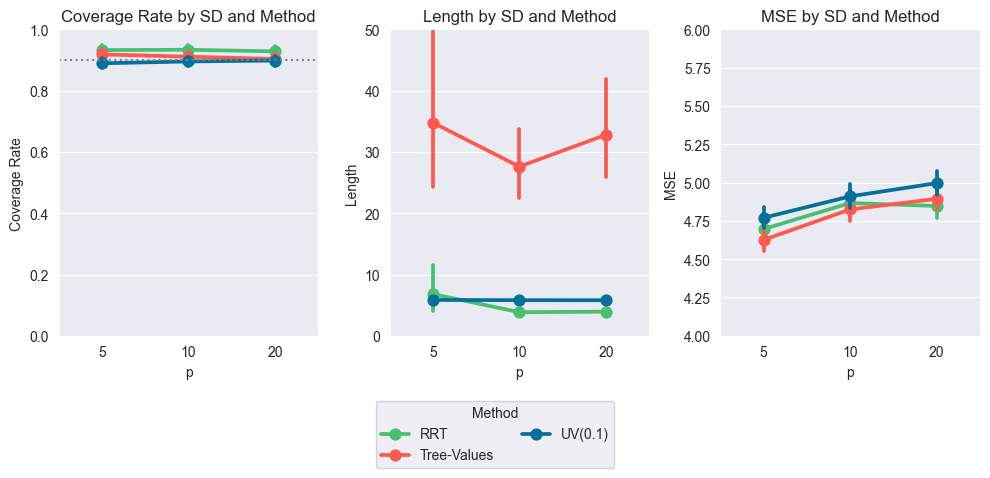

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

my_palette = {"RRT": "#48c072",
              "Tree-Values": "#fc5a50",
              "UV(0.1)": "#03719c"}

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    sns.pointplot(x='p', y=metric, hue='Method', data=oper_char_df, ax=axes[i],
                palette=my_palette)
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('p')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif metric == "Length":
        axes[i].set_ylim(0,50)
    elif metric == "MSE":
        axes[i].set_ylim(4,6)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=2)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [182]:
means = oper_char_df.groupby(['Method', "p"])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,Method,p,Coverage Rate,Length,MSE
0,RRT,5,0.932667,6.809922,4.697373
1,RRT,10,0.933690,3.850597,4.866794
2,RRT,20,0.928476,3.936722,4.847328
3,Tree-Values,5,0.918661,34.803349,4.626553
4,Tree-Values,10,0.911071,27.612518,4.825204
5,Tree-Values,20,0.903720,32.804743,4.894283
6,UV(0.1),5,0.889500,5.848740,4.770705
7,UV(0.1),10,0.895690,5.814612,4.910563
8,UV(0.1),20,0.898548,5.803019,4.996708


In [183]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [173]:
oper_char_df[tree_flag].groupby(['p'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,p,proportion_infinity
0,5,0.0
1,10,0.0
2,20,0.0
